# 1.1.2 Simple linear regression

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import poisson
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

Links: https://priceonomics.com/the-discovery-of-statistical-regression/
Links: https://www.youtube.com/watch?v=o_IP63-VtFA

## 1.1.2.1 El modelo forma I

$$ y = \beta_{0} + \beta_{1}x + e $$

con los supuestos:

- E(e) = 0
- Var(e) = $\sigma^2$ -> varianza constante
- e $\sim$ Normal
- Errores incorrelacionados

## 1.1.2.2 El modelo forma I

$$ 𝑦 \sim 𝑁(\mu, \sigma^2) $$

con los supuestos:

- $\mu = \beta_{0} + \beta_{1}x $
- $\sigma^2$ varianza constante

## 1.1.2.3 Distribución de 𝑦 dado 𝑥

Como:

$$ 𝑦 = \beta_{0} + \beta_{1}x + e $$

entonces:

- $𝐸(𝑦|𝑥) = \beta_{0} + \beta_{1}x $
- $𝑉𝑎𝑟(𝑦|𝑥) = 𝑉𝑎𝑟(\beta_{0} + \beta_{1}x + e) = \sigma^2 $

## 1.1.2.4 Parámetros del modelo

- $\beta_{0}$: Intercepto
- $\beta_{1}$: Coeficiente de 𝑥
- $\sigma^2$: Varianza de los errores

## 1.1.2.5 Estimación de parámetros

- Estimación por Mínimos Cuadrados
- Estimación por Máxima Verosimilitud

## 1.1.2.6 Modelo ajustado

$$ \hat{y} = \beta_{0} + \beta_{1}x $$

## 1.1.2.7 Residuales

Un residual (o error) es la diferencia entre el valor observado $𝑦_𝑖$ y el valor predicho o ajustado $\hat{𝑦_𝑖}$

$$ e_{i} = y_{i} - \hat{y_{i}} $$

Los residuales se utilizan para estudiar la adecuación del modelo a los supuestos

## 1.1.2.8 Estimación de Varianza

Estimar $\sigma^2$ es necesario para construir intervalos de confianza y realizar pruebas de hipótesis para
los parámetros

$$ \sigma^2 = \frac{𝑆𝑆_{𝑅𝑒𝑠}}{𝑛-2} ≡ 𝑀𝑆_{𝑅𝑒𝑠} $$ 

donde $𝑆𝑆_{𝑅𝑒𝑠}$ corresponde a la suma de cuadrados de los residuales

## 1.1.2.9 Calcular los Residuales

- Forma 1

$$ 𝑆𝑆_{𝑅𝑒𝑠} = \sum_{𝑖=1}^{𝑛} 𝑒_𝑖^2 $$

- Forma 2

$$ 𝑆𝑆𝑇 = \sum_{𝑖=1}^{𝑛} 𝑦_𝑖^2 − n\bar{𝑦}^2 $$

$$ 𝑆𝑆_{𝑅𝑒𝑠} = 𝑆𝑆_𝑇 − \hat{\beta_{1}} 𝑆_{𝑥𝑦} $$ 

## 1.1.2.10 Coeficiente de correlación lineal

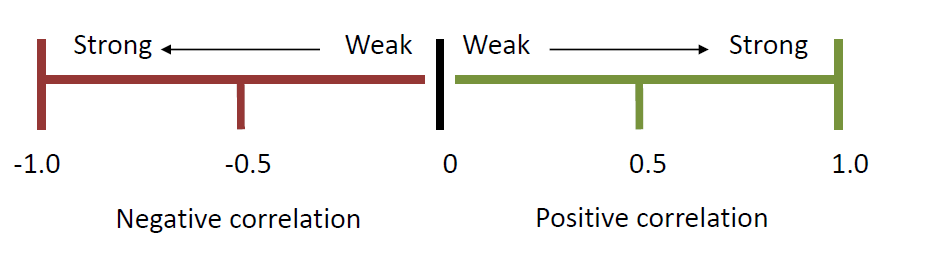

$$ 𝑟 = \frac{\sum_{𝑖=1}^{𝑛} (𝑥_𝑖 − \bar{𝑥}) (𝑦_i - \bar{y}) }{ \sqrt{\sum_{𝑖=1}^{𝑛} (𝑥_𝑖 − \bar{𝑥})^2  \sum_{𝑖=1}^{𝑛} (𝑦_i - \bar{y})^2 }} 

## 1.1.2.11 Ejemplo

Resistencia de soldadura

In [3]:
y_machine = [2158.70,1678.15,2316.00,2061.30,2207.50,1708.30,1784.70,2575.00,2357.90,2256.70,2165.20,2399.55,
             1779.80,2336.75,1765.30,2053.50,2414.40,2200.50,2654.20,1753.70]

x_machine = [15.50,23.75,8.00,17.00,5.50,19.00,24.00,2.50,7.50,11.00,13.00,3.75,25.00,9.75,22.00,18.00,6.00,
             12.50,2.00,21.50]

# Calcular la correlación lineal
correlation_matrix = np.corrcoef(x_machine, y_machine)
correlation = correlation_matrix[0, 1]

y_machine = np.array(y_machine)
x_machine = np.array(x_machine).reshape(-1, 1)

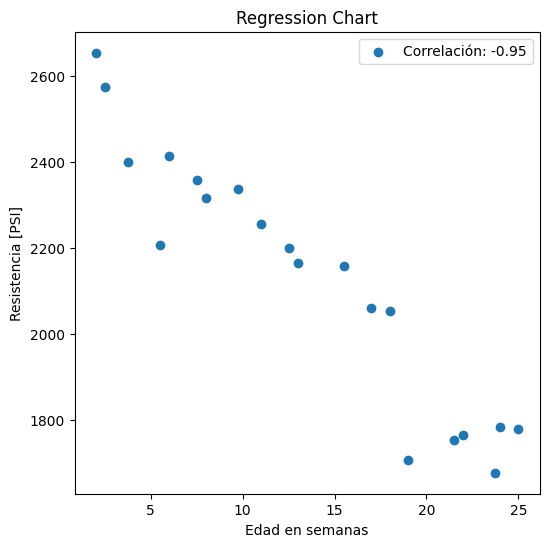

In [4]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x_machine, y_machine, label=f'Correlación: {correlation:.2f}')
plt.title('Regression Chart')
plt.xlabel('Edad en semanas')
plt.ylabel('Resistencia [PSI]')
plt.legend()
plt.show()

In [5]:
# Lineal regression
modelo_regresion = LinearRegression().fit(x_machine, y_machine)
pendiente = modelo_regresion.coef_[0]
intercepto = modelo_regresion.intercept_

linea_regresion = pendiente * x_machine + intercepto

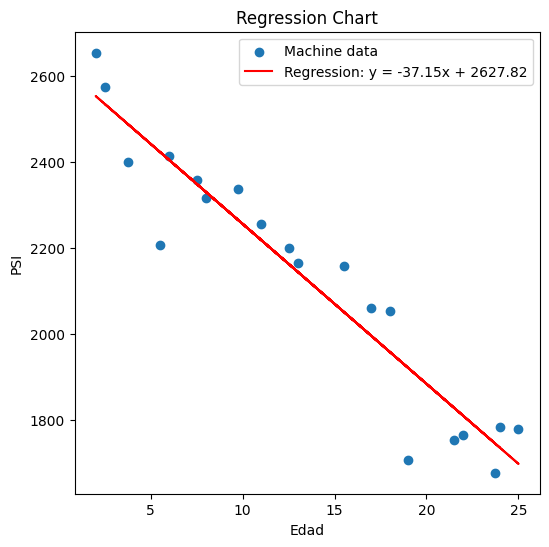

In [6]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x_machine, y_machine, label='Machine data')
plt.plot(x_machine, linea_regresion, color='red', label=f'Regression: y = {pendiente:.2f}x + {intercepto:.2f}')
plt.title('Regression Chart')
plt.xlabel('Edad')
plt.ylabel('PSI')
plt.legend()
plt.show()

Model: 

$$ Resistencia = \beta_{0} + \beta_{1} * Edad + e $$

$$ S_{xy} = \sum_{𝑖=1}^{𝑛} 𝑦_𝑖 𝑥_𝑖 − \frac{(\sum_{𝑖=1}^{𝑛} x_i) (\sum_{𝑖=1}^{𝑛} y_i)}{n} = 528492.64 − \frac{267.25 - 42627.15}{20} = −41112.65 $$

$$ S_{xx} = \sum_{𝑖=1}^{𝑛} 𝑥_𝑖^2 − \frac{(\sum_{𝑖=1}^{𝑛} x_i)^2}{n} = 4677.69 - \frac{71422.56}{20} = 1106.56 $$ 

$$ \beta_{1} = \frac{S_{xy}}{S_{xx}} = \frac{528492.64}{1106.56} = −37.15 $$

$$ \beta_{0} = \bar{y} \beta_{1} \bar{x} = 2131.35 − (−37.15)13.36 = 2627.82 $$

$$ 𝑆𝑆_{𝑇} = \sum_{𝑖=1}^{𝑛} 𝑦_𝑖^2 − 𝑛 \bar{𝑦}^2 = 92547433.45 − 20 * 4542685 = 1693738 $$

$$ 𝑆𝑆_{𝑅𝑒𝑠} = 𝑆𝑆_{𝑇} − \beta_{1} 𝑆_{𝑥𝑦} = 1693738 − (−37.15)(−41112.65) = 166402.65 $$

$$ \hat{\sigma}^2 = \frac{𝑆𝑆_{𝑅𝑒𝑠}}{𝑛−2} = \frac{166402.65}{20−2} = 9244.59 {psi}^2 $$

$$ \hat{\sigma} = 96.15 psi $$

Modelo estimado:

$$ \hat{Resistencia} = 2627.82 − 37.15 * Edad $$

Resoluciones: 

- 2627.82 psi es la resistencia esperada para una soldadura nueva.
- Por cada semana que envejezca la soldadura se espera una disminución media en la resistencia de 37.15 psi.

¿Cuál será la resistencia media cuando la edad de la soldadura es 10 semanas?

In [7]:
y_pred = modelo_regresion.predict([[10]])
y_pred

array([2256.28644955])

Para una soldadura de 10 semanas se espera que la resistencia media sea de 2256.28 psi.

In [8]:
y_pred = modelo_regresion.predict(x_machine)

df_results = pd.DataFrame({'X': x_machine.flatten(), 'y': y_machine.flatten(), 'pred': y_pred.flatten()})
df_results['error'] = df_results['y'] - df_results['pred']

df_results

,X,y,pred,error
0,15.50,2158.70,2051.941699,106.758301
1,23.75,1678.15,1745.424574,-67.274574
2,8.00,2316.00,2330.593631,-14.593631
3,17.00,2061.30,1996.211313,65.088687
4,5.50,2207.50,2423.477609,-215.977609
5,19.00,1708.30,1921.904131,-213.604131
6,24.00,1784.70,1736.136176,48.563824
7,2.50,2575.00,2534.938382,40.061618
8,7.50,2357.90,2349.170427,8.729573
9,11.00,2256.70,2219.132859,37.567141


In [9]:
df_results['error'].describe()

count    2.000000e+01
mean     1.705303e-13
std      9.354280e+01
min     -2.159776e+02
25%     -5.067616e+01
50%      2.873593e+01
75%      6.661030e+01
max      1.067583e+02
Name: error, dtype: float64

In [10]:
mse = mean_squared_error(y_machine, y_pred)
mse

8312.742903349057

In [11]:
rse = np.sqrt(mse)
rse

91.17424473692698

In [12]:
X_train = sm.add_constant(x_machine, prepend=True)
modelo = sm.OLS(endog=y_machine, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     165.4
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           1.64e-10
Time:                        08:09:45   Log-Likelihood:                -118.63
No. Observations:                  20   AIC:                             241.3
Df Residuals:                      18   BIC:                             243.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2627.8224     44.184     59.475      0.0

## 1.1.2.12 Activity

$ y_i \sim N (\mu_i, \sigma^2) \ con \ i=1,\cdots,n$

$ \mu_i = 4 + 5x_i $

$ \sigma^2=9 $

$ x_i \sim 𝑃𝑜𝑖𝑠𝑠𝑜𝑛(\lambda=5) $

1. Simule un conjunto de datos con $𝑛=5$ y estime los parámetros del modelo.

2. Simule 100 conjuntos de datos con $𝑛=5$ estime los parámetros del modelo y almacene todas las 100 estimaciones para cada uno de los tres parámetros Calcule las medias de los estimadores.

3. Repita el ejercicio anterior para 𝑛=5,10,15,20,30,50,100,500y calcule el error cuadrático medio para cada
estimador.

¿Qué tan cerca están las estimaciones del verdadero vector de parámetros? <br>
¿Qué tan bien se ajusta esta ecuación a los datos? <br>
¿Es probable que el modelo sea útil como predictor? <br>
¿Se viola alguna de las hipótesis básicas (como varianza constante y errores no correlacionados)? y en caso
afirmativo, ¿qué tan grave es eso?

In [13]:
# Numero de puntos
n = 5
# Varianza
var = 9
# Parámetro lambda para la distribución de Poisson
lmbda = 3.0

# Generar 5 números aleatorios con distribución de Poisson
x = poisson.rvs(lmbda, size=n)
# Calcular los estadisticos
media = -4+5*x
# Generar 5 números aleatorios con distribución de Normal con la media y la varianza
y = np.random.normal(loc=media, scale=np.sqrt(var), size=n)

# Lineal regression
modelo_regresion = LinearRegression().fit(x.reshape(-1, 1), y)
pendiente = modelo_regresion.coef_[0]
intercepto = modelo_regresion.intercept_

linea_regresion = pendiente * x + intercepto

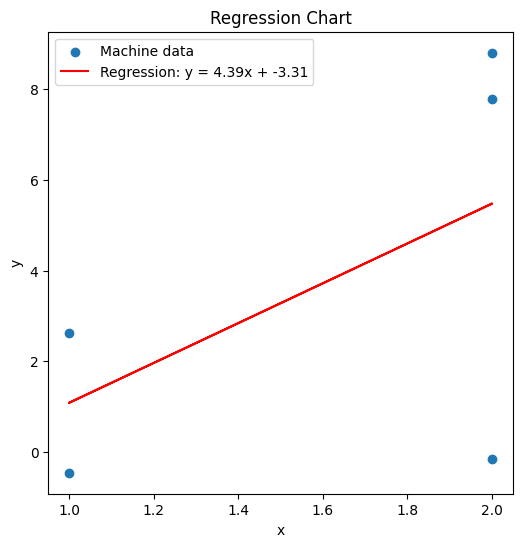

In [14]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x, y, label='Machine data')
plt.plot(x, linea_regresion, color='red', label=f'Regression: y = {pendiente:.2f}x + {intercepto:.2f}')
plt.title('Regression Chart')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [15]:
beta0 = []
beta1 = []

for i in range(100):

    # Generar 5 números aleatorios con distribución de Poisson
    x = poisson.rvs(lmbda, size=n)
    # Calcular los estadisticos
    media = -4+5*x
    # Generar 5 números aleatorios con distribución de Normal con la media y la varianza
    y = np.random.normal(loc=media, scale=np.sqrt(var), size=n)

    # Lineal regression
    modelo_regresion = LinearRegression().fit(x.reshape(-1, 1), y)
    beta0.append(modelo_regresion.coef_[0])
    beta1.append(modelo_regresion.intercept_)

mean_beta0 = np.mean(beta0)
mean_beta1 = np.mean(beta1)

linea_regresion = mean_beta0 * x + mean_beta1

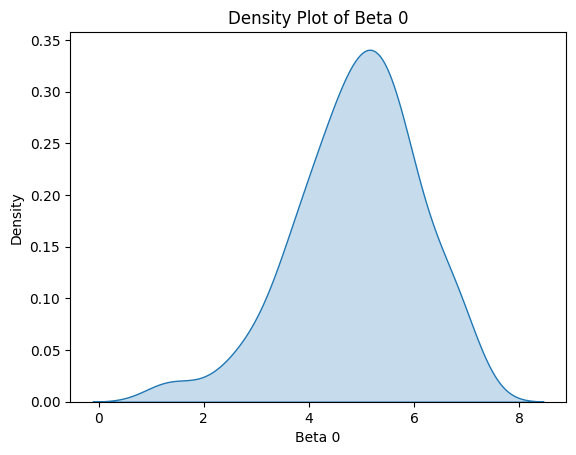

In [16]:
sns.kdeplot(beta0, shade=True)
plt.xlabel('Beta 0')
plt.ylabel('Density')
plt.title('Density Plot of Beta 0')
plt.show()

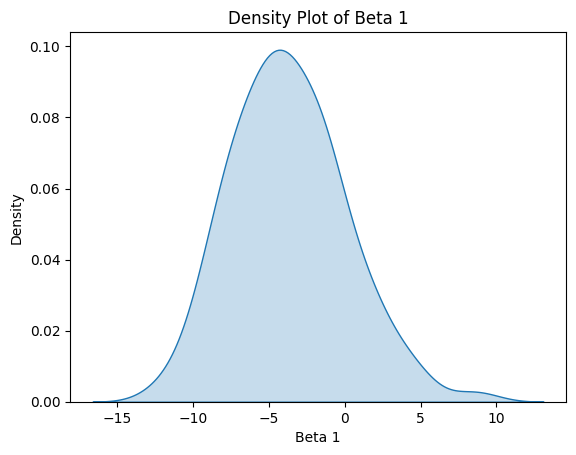

In [17]:
sns.kdeplot(beta1, shade=True)
plt.xlabel('Beta 1')
plt.ylabel('Density')
plt.title('Density Plot of Beta 1')
plt.show()

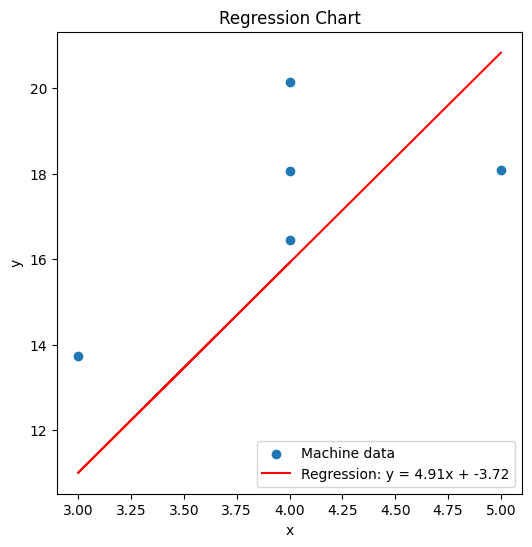

In [18]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x, y, label='Machine data')
plt.plot(x, linea_regresion, color='red', label=f'Regression: y = {mean_beta0:.2f}x + {mean_beta1:.2f}')
plt.title('Regression Chart')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [19]:
n = [5,10,15,20,30,50,100,500] #

betas0 = []
betas1 = []
nn = []

for e in n:

    beta0 = []
    beta1 = []

    for i in range(100):
        # Generar 5 números aleatorios con distribución de Poisson
        x = poisson.rvs(lmbda, size=e)
        # Calcular los estadisticos
        media = -4+5*x
        # Generar 5 números aleatorios con distribución de Normal con la media y la varianza
        y = np.random.normal(loc=media, scale=np.sqrt(var), size=e)

        # Lineal regression
        modelo_regresion = LinearRegression().fit(x.reshape(-1, 1), y)
        beta0.append(modelo_regresion.coef_[0])
        beta1.append(modelo_regresion.intercept_)

    # promedio de las 100 simulaciones
    mean_beta0 = np.mean(beta0)
    mean_beta1 = np.mean(beta1)
    
    betas0.append(mean_beta0)
    betas1.append(mean_beta1)
    nn.append(e)

print(betas0)
print(betas1)
print(nn)
print()

[5.033687273004883, 4.9685252278405185, 5.040746681583941, 4.996885467466528, 4.972571327927676, 4.995249550534768, 4.975281862165851, 4.999248102366284]
[-4.2354623779426035, -3.868373178377033, -4.1523895293485245, -3.9148222915808706, -3.848412278052606, -4.037978067237049, -3.9260253694400045, -4.005356987516757]
[5, 10, 15, 20, 30, 50, 100, 500]



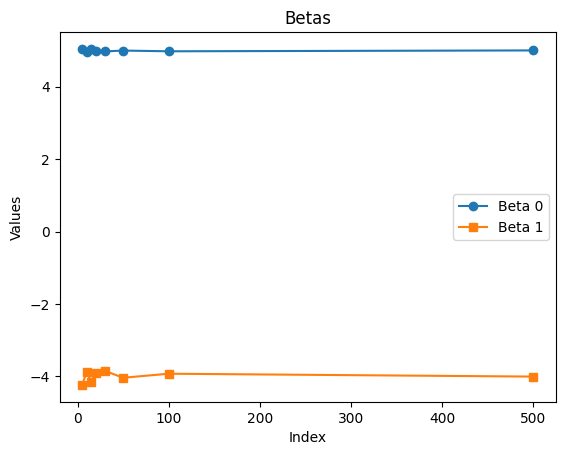

In [20]:
# Crear el gráfico de líneas
plt.plot(nn, betas0, label='Beta 0', marker='o')  
plt.plot(nn, betas1, label='Beta 1', marker='s') 

plt.title('Betas')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend() 
plt.show()

In [21]:
n = [5,10,15,20,30,50,100,500] #

betas0 = []
betas1 = []
nn = []

for e in n:

    beta0 = []
    beta1 = []

    for i in range(100):
        # Generar 5 números aleatorios con distribución de Poisson
        x = poisson.rvs(lmbda, size=e)
        # Calcular los estadisticos
        media = -4+5*x
        # Generar 5 números aleatorios con distribución de Normal con la media y la varianza
        y = np.random.normal(loc=media, scale=np.sqrt(var), size=e)

        # Lineal regression
        modelo_regresion = LinearRegression().fit(x.reshape(-1, 1), y)
        beta0.append(modelo_regresion.coef_[0])
        beta1.append(modelo_regresion.intercept_)

    # promedio de las 100 simulaciones
    mean_beta0 = np.mean(beta0)
    mean_beta1 = np.mean(beta1)

    v1 = ((mean_beta0 - 5)**2)/e
    v2 = ((mean_beta1 - 4)**2)/e

    betas0.append(v1)
    betas1.append(v2)
    nn.append(e)

print(betas0)
print(betas1)
print(nn)
print()

[0.0008560692109983694, 6.6182216269389e-05, 3.338266596410492e-05, 0.00030039195944398726, 5.6049889854582176e-05, 4.359897933648952e-05, 1.3800843249968864e-06, 1.4240160064734184e-07]
[12.20253975692831, 6.147451415470859, 4.243344114220062, 3.4273659619527295, 2.215562069984725, 1.3147188689221168, 0.63324587674606, 0.12767419027359636]
[5, 10, 15, 20, 30, 50, 100, 500]



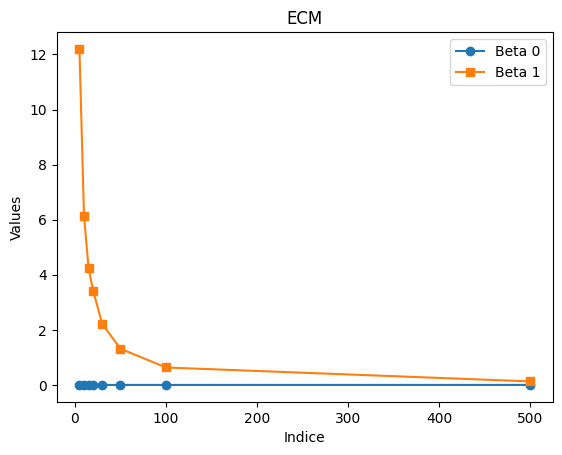

In [22]:
# Crear el gráfico de líneas
plt.plot(nn, betas0, label='Beta 0', marker='o')  
plt.plot(nn, betas1, label='Beta 1', marker='s') 

plt.title('ECM')
plt.xlabel('Indice')
plt.ylabel('Values')
plt.legend() 
plt.show()

## 1.1.2.13 ¿Qué es el error estándar?

$$ se(\hat{\beta_{0}}) = \sqrt{𝑀𝑆_{𝑅𝑒𝑠}  \left( \frac{1}{n} + \frac{\bar{x}^2}{S_{xx}} \right)} $$ 

$$ se(\hat{\beta_{1}}) = \sqrt{ \frac{𝑀𝑆_{𝑅𝑒𝑠}}{S_{xx}} } $$ 

Calculate:

$$ se(\hat{\beta_{0}}) = \sqrt{9244.59  \left( \frac{1}{20} + \frac{13.36^2}{1106.56} \right)} = 44.18 $$ 

$$ se(\hat{\beta_{1}}) = \sqrt{ \frac{9244.59}{1106.56} } = 2.89 $$ 

## 1.1.2.14 Prueba de hipótesis para $\beta_{0}$ y $\beta_{1}$

Hipótesis para $\beta_0$:

$$ H_0: \beta_0 = \beta_{00} $$
$$ H_1: \beta_0 \neq \beta_{00} $$

Estadístico de prueba:

$$ 𝑡_0 = \frac{\hat{\beta_0} - \beta_{00}}{se(\hat{\beta_0})} $$

El estadístico de prueba tiene distribución $𝑡_{𝑛−2}$

Para $\beta_{1}$ solo se debe cambiar $\beta_0$ por $\beta_1$ y $\beta_{00}$ por $\beta_{10}$

### Ejemplo prueba de hipótesis para $\beta_0$ y $\beta_{1}$

El proveedor de la soldadura afirma que la resistencia media para soldaduras nuevas es 2700 psi Pruebe la hipótesis de que la resistencia media es diferente a un nivel de significancia del 5

Hipótesis:

$$ H_0: \beta_0 = 2700 $$
$$ H_1: \beta_0 \neq 2700 $$

Estadístico de prueba:

$$ 𝑡_0 = \frac{\hat{\beta_0} - \beta_{00}}{se(\hat{\beta_0})} = \frac{2627.82 - 2700}{44.18} = −1.6337 $$

De la tabla t-student con $df=18$ Valor-P $\epsilon$ (10%, 20%)

Como Valor-P > 5 no hay evidencias para rechazar $H_0$

Existe relacion lineal entre $x$ y $y$

Hipótesis:

$$ H_0: \beta_1 = 0 $$
$$ H_1: \beta_1 \neq 0 $$

Estadístico de prueba:

$$ 𝑡_0 = \frac{\hat{\beta_1} - \beta_{10}}{se(\hat{\beta_1})} = \frac{-37.1536 - 0}{2.889} = -12.860 $$

De la tabla t-student con $df=18$ Valor-P $\epsilon$ (10%, 20%)

Como Valor-P > 5 hay evidencias para rechazar $H_1$, por lo que hay una relación lineal entre la resistencia del corte y la edad del propelente.

## 1.1.2.15 Análisis de varianza (anova)

Es un método alternativo para probar la significancia de la regresión

$$ H_0: \beta_1 = 0 $$
$$ H_1: \beta_1 \neq 0 $$

¿En qué se basa? en la Variabilidad total de y

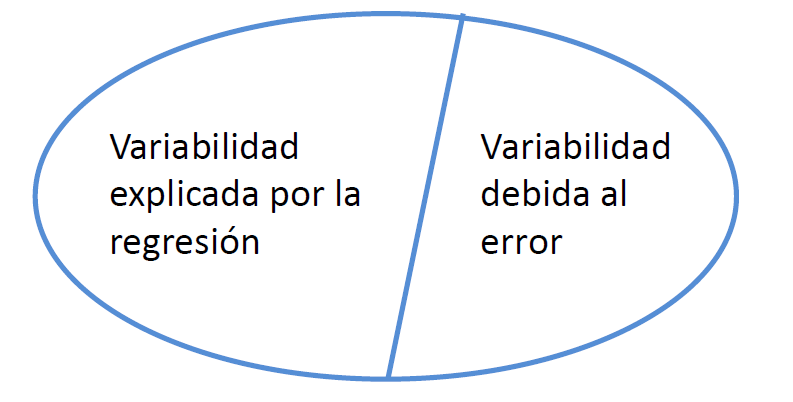

$$ 𝑆𝑆_𝑇 = 𝑆𝑆_𝑅 + 𝑆𝑆_{𝑅𝑒𝑠}




## 1.1.2.16 Intervalos de confianza

Para $\beta_0$:

$$ \hat{\beta_0} - t_{\frac{\alpha}{2}, n-2} se(\hat{\beta_0}) \leq \beta_0 \leq \hat{\beta_0} + t_{\frac{\alpha}{2}, n-2} se(\hat{\beta_0}) $$ 

Para $\beta_1$:

$$ \hat{\beta_1} - t_{\frac{\alpha}{2}, n-2} se(\hat{\beta_1}) \leq \beta_1 \leq \hat{\beta_1} + t_{\frac{\alpha}{2}, n-2} se(\hat{\beta_1}) $$ 

Para $\sigma^2$:

$$ \frac{(n-2)MS_{Res}}{\Chi_{\frac{\alpha}{2}, n-2}^2} \leq \sigma^2 \leq \frac{(n-2)MS_{Res}}{\Chi_{1- \frac{\alpha}{2}, n-2}^2} $$

## 1.1.2.17 Ejemplo: IC del 95% para $ \beta_0 $ y $ \beta_1 $

Tenemos que: 

$ \hat{\beta_0} = 2627.82 $

$ se(\hat{\beta_0}) = 44.18 $

$ \hat{\beta_1} = -37.1536 $

$ se(\hat{\beta_1}) = 2.89 $

$ n = 20 $  

$ 𝑀𝑆_{𝑅𝑒𝑠} = 9244.59 $ 

$ t_{\frac{\alpha}{2}, n-2} = t_{\frac{0.05}{2}, n-2} = t_{0.025, 18} = 2.101 $

$ \Chi_{\frac{\alpha}{2}, n-2}^2 = \Chi_{\frac{0.05}{2}, n-2}^2 = \Chi_{0.025, 18}^2 = 8.2 $

$ \Chi_{1- \frac{\alpha}{2}, n-2}^2 = \Chi_{1- \frac{0.05}{2}, n-2}^2 = \Chi_{0.975, 18}^2 = 31.5 $


entonces reemplazamos en la formula para obtener el intervalo de confianza:

Para $\beta_0$:

$$ \hat{\beta_0} - t_{\frac{\alpha}{2}, n-2} se(\hat{\beta_0}) \leq \beta_0 \leq \hat{\beta_0} + t_{\frac{\alpha}{2}, n-2} se(\hat{\beta_0}) $$ 

Para $\beta_1$:

$$ \hat{\beta_1} - t_{\frac{\alpha}{2}, n-2} se(\hat{\beta_1}) \leq \beta_1 \leq \hat{\beta_1} + t_{\frac{\alpha}{2}, n-2} se(\hat{\beta_1}) $$ 

Para $\sigma^2$:

$$ \frac{(n-2)MS_{Res}}{\Chi_{\frac{\alpha}{2}, n-2}^2} \leq \sigma^2 \leq \frac{(n-2)MS_{Res}}{\Chi_{1- \frac{\alpha}{2}, n-2}^2} $$

Los intervalos de confianza son

$$ 2535 \leq \hat{\beta_0} = 2627.82 \leq 2720.64 $$ 

$$ -43.225 \leq \hat{\beta_1} = -37.1536 \leq -31.08 $$ 

$$ 5282 \leq \hat{\sigma}^2 = 9244.59 \leq 20219.03 $$ 

In [24]:
# Crear el modelo de regresión lineal
modelo = LinearRegression().fit(x_machine, y_machine)

# Obtener los coeficientes beta
beta_1 = modelo.coef_[0]
beta_0 = modelo.intercept_

# Número de observaciones
n = len(x_machine)

# Calcular el error estándar de la estimación
y_pred = modelo.predict(x_machine)
error = y_machine - y_pred
error_estandar = np.sqrt(np.sum(error**2) / (n - 2))

# Calcular la desviación estándar de los coeficientes
X_mean = np.mean(x_machine)
desv_est_beta_1 = error_estandar / (np.sqrt(np.sum((x_machine - X_mean)**2)))
desv_est_beta_0 = error_estandar * np.sqrt(np.sum(x_machine**2) / (n * np.sum((x_machine - X_mean)**2)))

# Calcular los intervalos de confianza para los coeficientes beta
t_value = stats.t.ppf(0.975, df=n-2)  # Valor crítico de t para un intervalo de confianza del 95%
intervalo_beta_1 = t_value * desv_est_beta_1
intervalo_beta_0 = t_value * desv_est_beta_0

# Imprimir los intervalos de confianza
print("Intervalo de confianza para beta_1:", (beta_1 - intervalo_beta_1, beta_1 + intervalo_beta_1))
print("Intervalo de confianza para beta_0:", (beta_0 - intervalo_beta_0, beta_0 + intervalo_beta_0))

Intervalo de confianza para beta_1: (-43.22337857013981, -31.0838033196707)
Intervalo de confianza para beta_0: (2534.99540488044, 2720.6493131221523)


## 1.1.2.18 Intervalo de confianza para la respuesta media $𝐸(𝑦|𝑥_0)$

Si $\hat{\mu}_{𝑦|𝑥0}$ es la media estimada para la variable respuesta cuando $𝑥 = 𝑥_0$ entonces un IC del $(1 − \frac{\alpha}{2}) × 100 \% $ para $𝐸(𝑦|𝑥_0)$ está dado por:

$$ \hat{\mu}_{𝑦|𝑥0} \pm \frac{\alpha}{2}, n-2 \sqrt{ 𝑀𝑆_{𝑅𝑒𝑠} \left( \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}} \right)} $$

$$ 2086.230 \leq 𝐸(𝑦|13.3626) \leq 2176.571 $$ 


In [25]:
# Obtener las predicciones
predictions = modelo.predict(x_machine)

# Calcular los residuos
residuals = y_machine - predictions

# Calcular el error estándar de la estimación
mse = np.mean(residuals**2)
se = np.sqrt(mse)

# Calcular los intervalos de confianza (95%)
ci = 1.96 * se  # 1.96 es el valor crítico para un intervalo de confianza del 95%
lower_bound = predictions - ci
upper_bound = predictions + ci

In [27]:
lower_bound

array([1873.24017967, 1566.72305438, 2151.89211176, 1817.50979325,
       2244.77608912, 1743.20261136, 1557.43465664, 2356.23686195,
       2170.46890723, 2040.43133892, 1966.12415703, 2309.79487327,
       1520.28106569, 2086.8733276 , 1631.74183853, 1780.35620231,
       2226.19929365, 1984.70095251, 2374.81365743, 1650.318634  ])

In [28]:
upper_bound

array([2230.64321904, 1924.12609374, 2509.29515113, 2174.91283262,
       2602.17912849, 2100.60565073, 1914.83769601, 2713.63990132,
       2527.8719466 , 2397.83437829, 2323.5271964 , 2667.19791264,
       1877.68410506, 2444.27636697, 1989.1448779 , 2137.75924168,
       2583.60233302, 2342.10399187, 2732.2166968 , 2007.72167337])

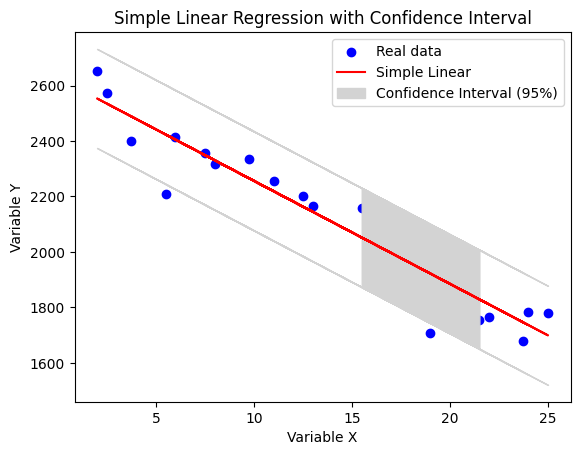

In [26]:
# Graficar los resultados
plt.scatter(x_machine, y_machine, color='blue', label='Real data')
plt.plot(x_machine, predictions, color='red', label='Simple Linear')
plt.fill_between(x_machine.flatten(), lower_bound, upper_bound, color='lightgrey', 
                 label='Confidence Interval (95%)')

plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Simple Linear Regression with Confidence Interval')
plt.legend()
plt.show()

## 1.1.2.19 Intervalo de confianza para la respuesta media $y_0$

$$ \hat{y}_{0} \pm \frac{\alpha}{2}, n-2 \sqrt{ 𝑀𝑆_{𝑅𝑒𝑠} \left( 1 + \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}} \right)} $$

Nota: revisar la prueba de hipotesis para Beta 0

Revisar anova en python, intervalo de confianza de sigma

In [ ]:
print('ok_')

ok_
